## merge file corpus kelompok 1

1. Jumlah corpus_Ruski_file_0.txt: 265
2. Jumlah corpus_Doni_file_1.txt: 200
3. Jumlah corpus_Habib_file_2.txt: 200
4. Jumlah corpus_Iskandar_file_4.txt: 208
5. Jumlah corpus_muttaqin_file.txt: 201
6. Jumlah corpus_Saryulis_file_5.txt: 200

**total merged_corpus_kelompok_1.txt: 1274**

In [12]:
import os

# membuat list nama file .txt dalam direktori 
def list_txt_files(directory):
    txt_files = []
    for file in os.listdir(directory):
        if file.endswith(".txt"):
            txt_files.append(file)
    return txt_files

# menggabungkan semua file .txt dalam direktori menjadi satu file
def merge_txt_files(directory, output_file):
    txt_files = list_txt_files(directory)

    with open(output_file, 'w') as outfile:
        for file in txt_files:
            with open(os.path.join(directory, file), 'r') as infile:
                outfile.write(infile.read())

# Menentukan direktori kerja dan folder output
directory = os.getcwd()  # path direktori saat ini
output_directory = os.path.join(directory, 'content')

# Membuat folder jika belum ada
os.makedirs(output_directory, exist_ok=True)

# Menentukan nama file output
output_file = os.path.join(output_directory, "merged_corpus_kelompok_1.txt")

# Menggabungkan file
merge_txt_files(directory, output_file)

print(f"Semua file .txt telah digabungkan menjadi {output_file}")


Semua file .txt telah digabungkan menjadi D:\KULIAH\Lingkom\corpus\RUSKI\CODE PREPROSES\Kelompok 1\Kerja TF-IDF\content\merged_corpus_kelompok_1.txt


-------------------------------------------

## Word Embedding
membuat word embedding menggunakan TF-IDF dari corpus bahasa Aceh

### 1. Membaca File TXT

In [2]:
import pandas as pd

# Ganti 'path_to_file.txt' dengan path ke file Anda
with open('merged_corpus_kelompok_1.txt', 'r', encoding='utf-8') as file:
    corpus = file.readlines()


### 2. Pra-pemrosesan Teks

In [3]:
import nltk
from nltk.corpus import stopwords
import string

# Unduh stop words jika belum
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))  # Ganti dengan 'indonesian' jika perlu

def preprocess(text):
    # Ubah menjadi huruf kecil
    text = text.lower()
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

processed_corpus = [preprocess(text) for text in corpus]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# menampilkan 10 data kalimat yang telah di pre-processing penghilangan  
# kata-kata umum seperti ("dan", "di", "ke") dan tanda baca.
print(processed_corpus[:10])

['lon kuneuk jak u pasai euntreuk supot', 'peu kalheuh kapajoh bu malam', 'awak nyan teungoh jimeureunoe keu ujian minggu nyoe', 'singoh beungoh geutanyoe beurangkat u bandung', 'mak teungoh geutaguen bu bak dapu', 'lon hana jeut kujak bak pesta beuklam', 'peu na katupat pat kupeuduek kunci moto lon', 'awak nyan ipreh dikeue rumoh sikula', 'buku kacok baroe peu kalheuh kapulang', 'geutanyoe peureulee tapeuseuleusoe tugaih nyoe sigohlom singoh']


### 3. Tokenisasi

In [10]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokenized_corpus = [word_tokenize(text) for text in processed_corpus]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# menampilkan 10 data yang telah di tokenisasi menjadi per kata
print(tokenized_corpus[:10])

[['lon', 'kuneuk', 'jak', 'u', 'pasai', 'euntreuk', 'supot'], ['peu', 'kalheuh', 'kapajoh', 'bu', 'malam'], ['awak', 'nyan', 'teungoh', 'jimeureunoe', 'keu', 'ujian', 'minggu', 'nyoe'], ['singoh', 'beungoh', 'geutanyoe', 'beurangkat', 'u', 'bandung'], ['mak', 'teungoh', 'geutaguen', 'bu', 'bak', 'dapu'], ['lon', 'hana', 'jeut', 'kujak', 'bak', 'pesta', 'beuklam'], ['peu', 'na', 'katupat', 'pat', 'kupeuduek', 'kunci', 'moto', 'lon'], ['awak', 'nyan', 'ipreh', 'dikeue', 'rumoh', 'sikula'], ['buku', 'kacok', 'baroe', 'peu', 'kalheuh', 'kapulang'], ['geutanyoe', 'peureulee', 'tapeuseuleusoe', 'tugaih', 'nyoe', 'sigohlom', 'singoh']]


In [14]:
# Gabungkan semua token dalam satu list
all_tokens = [word for sublist in tokenized_corpus for word in sublist]
print(all_tokens[:10])

['lon', 'kuneuk', 'jak', 'u', 'pasai', 'euntreuk', 'supot', 'peu', 'kalheuh', 'kapajoh']


# Menghitung Frekuensi Kata (Word Frequency)

In [39]:
len(all_tokens)

9747

In [35]:
from collections import Counter
# Menghitung frekuensi kata
word_freq = Counter(all_tokens)

# Menampilkan hasil frekuensi kata dari nilai tertinggi ke terendah
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print("Frekuensi Kata dari tinggi ke rendah :")
for word, freq in sorted_word_freq[:20]:
    print(f"{word}: {freq}")

Frekuensi Kata dari tinggi ke rendah :
nyan: 208
bak: 203
lon: 173
nyang: 123
ka: 119
ngon: 96
keu: 95
teungoh: 92
lam: 85
nyoe: 83
na: 81
hana: 79
raja: 77
jak: 72
keuh: 67
kamoe: 63
that: 57
oh: 57
ureueng: 56
loon: 54


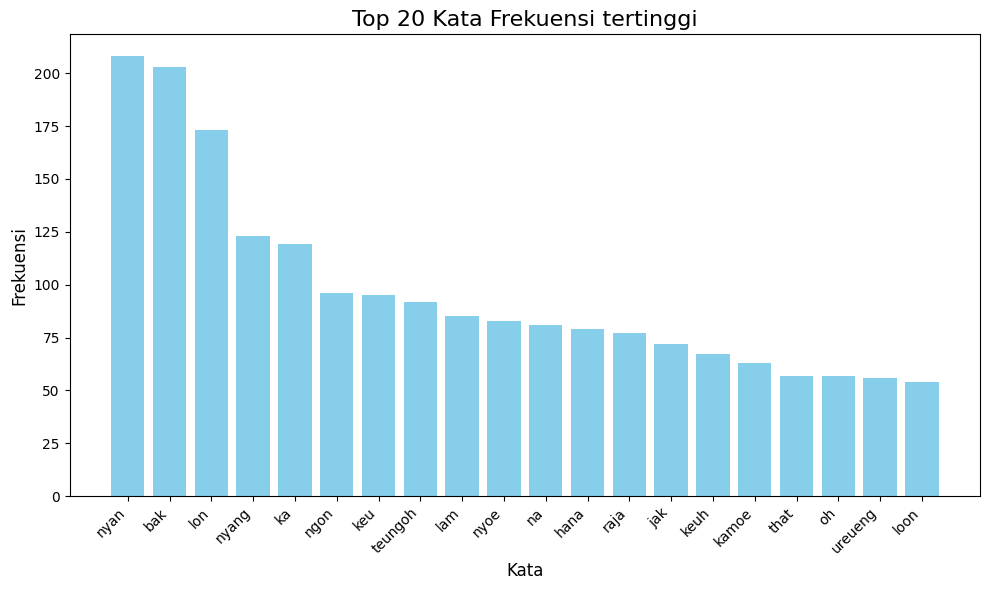

In [32]:
import matplotlib.pyplot as plt
# Memisahkan kata dan frekuensi
words, frequencies = zip(*sorted_word_freq[:20])

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')

# Menambahkan judul dan label
plt.title('Top 20 Kata Frekuensi tertinggi', fontsize=16)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Rotasi label sumbu x agar terbaca
plt.xticks(rotation=45, ha='right')

# Tampilkan plot
plt.tight_layout()
plt.show()

# Menghitung N-grams (Bigram dan Trigram)

In [43]:
from nltk import ngrams

# Fungsi untuk membuat N-grams
def generate_ngrams(text, n):
    return list(ngrams(text, n))

# Menghasilkan Bigrams dan Trigrams untuk setiap kalimat
bigrams = [generate_ngrams(tokens, 2) for tokens in tokenized_corpus]
trigrams = [generate_ngrams(tokens, 3) for tokens in tokenized_corpus]

# Menampilkan Bigrams dan Trigrams
print("\nBigrams:")
for bigram_list in bigrams[:10]:
    print(bigram_list)

print("\nTrigrams:")
for trigram_list in trigrams[:10]:
    print(trigram_list)


Bigrams:
[('lon', 'kuneuk'), ('kuneuk', 'jak'), ('jak', 'u'), ('u', 'pasai'), ('pasai', 'euntreuk'), ('euntreuk', 'supot')]
[('peu', 'kalheuh'), ('kalheuh', 'kapajoh'), ('kapajoh', 'bu'), ('bu', 'malam')]
[('awak', 'nyan'), ('nyan', 'teungoh'), ('teungoh', 'jimeureunoe'), ('jimeureunoe', 'keu'), ('keu', 'ujian'), ('ujian', 'minggu'), ('minggu', 'nyoe')]
[('singoh', 'beungoh'), ('beungoh', 'geutanyoe'), ('geutanyoe', 'beurangkat'), ('beurangkat', 'u'), ('u', 'bandung')]
[('mak', 'teungoh'), ('teungoh', 'geutaguen'), ('geutaguen', 'bu'), ('bu', 'bak'), ('bak', 'dapu')]
[('lon', 'hana'), ('hana', 'jeut'), ('jeut', 'kujak'), ('kujak', 'bak'), ('bak', 'pesta'), ('pesta', 'beuklam')]
[('peu', 'na'), ('na', 'katupat'), ('katupat', 'pat'), ('pat', 'kupeuduek'), ('kupeuduek', 'kunci'), ('kunci', 'moto'), ('moto', 'lon')]
[('awak', 'nyan'), ('nyan', 'ipreh'), ('ipreh', 'dikeue'), ('dikeue', 'rumoh'), ('rumoh', 'sikula')]
[('buku', 'kacok'), ('kacok', 'baroe'), ('baroe', 'peu'), ('peu', 'kalheuh

### 4. Menghitung TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ubah token kembali ke format string
tokenized_corpus_str = [' '.join(tokens) for tokens in tokenized_corpus]


In [46]:
print(tokenized_corpus_str[:10])

['lon kuneuk jak u pasai euntreuk supot', 'peu kalheuh kapajoh bu malam', 'awak nyan teungoh jimeureunoe keu ujian minggu nyoe', 'singoh beungoh geutanyoe beurangkat u bandung', 'mak teungoh geutaguen bu bak dapu', 'lon hana jeut kujak bak pesta beuklam', 'peu na katupat pat kupeuduek kunci moto lon', 'awak nyan ipreh dikeue rumoh sikula', 'buku kacok baroe peu kalheuh kapulang', 'geutanyoe peureulee tapeuseuleusoe tugaih nyoe sigohlom singoh']


In [53]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokenized_corpus_str)


In [54]:
print("Sparsity: ", 1.0 - (X.nnz / (X.shape[0] * X.shape[1])))

Sparsity:  0.9975811041548094


In [55]:
# Menampilkan fitur (kata-kata yang direpresentasikan)
print("Fitur TF-IDF:")
print(vectorizer.get_feature_names_out())

Fitur TF-IDF:
['abang' 'abbas' 'abdullah' ... 'én' 'ôn' 'ônôn']


In [60]:
# Menampilkan matriks TF-IDF untuk setiap dokumen
print("\nMatriks TF-IDF:")
print(X.toarray())


Matriks TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 5. Membuat DataFrame

In [61]:
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


### 6. Analisis dan Penyimpanan

In [62]:
tfidf_df.to_csv('tfidf_output.csv', index=False)
